
- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
- Source: https://www.tensorflow.org/datasets/catalog/cifar10

In this notebook we are going to build a CNN model that can classify images of various objects. We have 10 class of images:

Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck

In [1]:
import pandas as pd                                                 # for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clrity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('display.float_format', lambda x: '%.3f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborn library for interactive visualization
#set seaborn plotting aesthetics
sns.set(style='whitegrid')
%matplotlib inline

In [2]:
# loading the dataset
# Import dataset from keras
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
print('Training data : ', X_train.shape, y_train.shape) 
print('Testing data : ', X_test.shape, y_test.shape) 
print('Training data =',round(100*X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]),2),"% of total data")
print('Testing data =',round(100*X_test.shape[0]/(X_train.shape[0]+X_test.shape[0]),2),"% of total data")

Training data :  (50000, 32, 32, 3) (50000, 1)
Testing data :  (10000, 32, 32, 3) (10000, 1)
Training data = 83.33 % of total data
Testing data = 16.67 % of total data


In [4]:
# ANALYZE LABELS

Labels = np.unique(y_train)  # DISPLAY UNIQUE LABELS
NumberOfLabels = len(Labels)  # LENGTH OF UNIQUES LABELS
print('Labels : ', Labels)
print('Total number of labels : ', NumberOfLabels)

Labels :  [0 1 2 3 4 5 6 7 8 9]
Total number of labels :  10


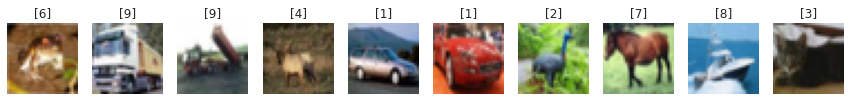

In [5]:
# visualizing the first 10 images in the dataset and their labels

N=10 # NUMBER OF IMAGES YOU WISH TO SEE

plt.figure(figsize=(15,15))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(X_train[i])  
    plt.title("{}".format(y_train[i]))
    plt.axis('off')
plt.show()

### Image Preprocessing

In [6]:
## Train data
X_train = X_train.astype('float32') #converting to float
X_train = X_train.reshape(X_train.shape[0],32,32,3) #reshaping all images to 32X32X3(in case some are not of that shape)
X_train = X_train / 255. #normalizing by each value in the 3d matrices by 255. 

X_test = X_test.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 32,32,3)
X_test = X_test / 255.

print('Shape of the training data is : ', X_train.shape)  
print('Shape of the testing data is: ', X_test.shape)

Shape of the training data is :  (50000, 32, 32, 3)
Shape of the testing data is:  (10000, 32, 32, 3)


In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
# Transform target variable into one-hotencoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Modelling

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

## CNN model 1

#### Layer 1: Convolution
- Number of Filters: 32
- Kernel size: 3 x 3
- Activation function: Relu
- Pooling: 2
- Padding: 0
- Stride: 1

#### Layer 2: Convolution
- Number of Filters: 64
- Kernel size: 3 x 3
- Activation function: Relu
- Pooling: 2
- Padding: same
- Stride: 1

#### Layer 3: FC 
- Dense layer units: 64
- Softmax output units: 10

In [10]:
model1 = Sequential()

# Input Layer
model1.add(BatchNormalization(input_shape = (32, 32, 3)))

model1.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (32, 32, 3))) 
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.25))

model1.add(Convolution2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.25))

model1.add(Flatten()) 

# fully connected layer
model1.add(Dense(units = 64,activation = 'relu'))

# OutPut Layer
model1.add(Dense(units = 10, activation = 'softmax')) 

2022-11-06 22:25:41.934707: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 22:25:42.023330: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 22:25:42.024091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 22:25:42.025923: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

In [12]:
METRICS = [
    'accuracy',
    Precision(name='precision'),
    Recall(name='recall')
]
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=METRICS)

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0

In [13]:
MODEL1 = model1.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), initial_epoch=0)

2022-11-06 22:25:46.526972: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-11-06 22:25:48.141183: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1563/1563 [==============================] - 16s 6ms/step - loss: 1.3942 - accuracy: 0.5035 - precision: 0.7064 - recall: 0.2996 - val_loss: 1.1222 - val_accuracy: 0.6067 - val_precision: 0.7792 - val_recall: 0.4006
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0465 - accuracy: 0.6346 - precision: 0.7634 - recall: 0.4976 - val_loss: 0.9518 - val_accuracy: 0.6735 - val_precision: 0.8036 - val_recall: 0.5172
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9327 - accuracy: 0.6730 - precision: 0.7815 - recall: 0.5618 - val_loss: 0.8932 - val_accuracy: 0.6848 - val_precision: 0.7978 - val_recall: 0.5686
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8647 - accuracy: 0.6986 - precision: 0.7963 - recall: 0.6027 - val_loss: 0.8517 - val_accuracy: 0.7090 - val_precision: 0.8152 - val_recall: 0.5833
Epoch 5/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8099 - accuracy: 0.7163 - pr

In [14]:
def evolution(model, epochs):
    epochs = range(1,epochs+1)
    
    plt.figure(figsize=(20, 25))
    
    plt.subplot(4, 2, 1)
    loss_train = model.history['loss']
    loss_val = model.history['val_loss']
    plt.plot(epochs, loss_train, 'g', label='Training loss')
    plt.plot(epochs, loss_val, 'b', label='validation loss')
    plt.title('Loss Function Evolution')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    
    plt.subplot(4, 2, 2)
    accuracy_train = model.history['accuracy']
    accuracy_val = model.history['val_accuracy']
    plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
    plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
    plt.title('Accuracy Function Evolution')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.subplot(4, 2, 3)
    precision_train = model.history['precision']
    precision_val = model.history['val_precision']
    plt.plot(epochs, precision_train, 'g', label='Training precision')
    plt.plot(epochs, precision_val, 'b', label='validation precision')
    plt.title('Precision Function Evolution')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()



    plt.subplot(4, 2, 4)
    recall_train = model.history['recall']
    recall_val = model.history['val_recall']
    plt.plot(epochs, recall_train, 'g', label='Training recall')
    plt.plot(epochs, recall_val, 'b', label='validation recall')
    plt.title('Recall Function Evolution')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
  

    return()

()

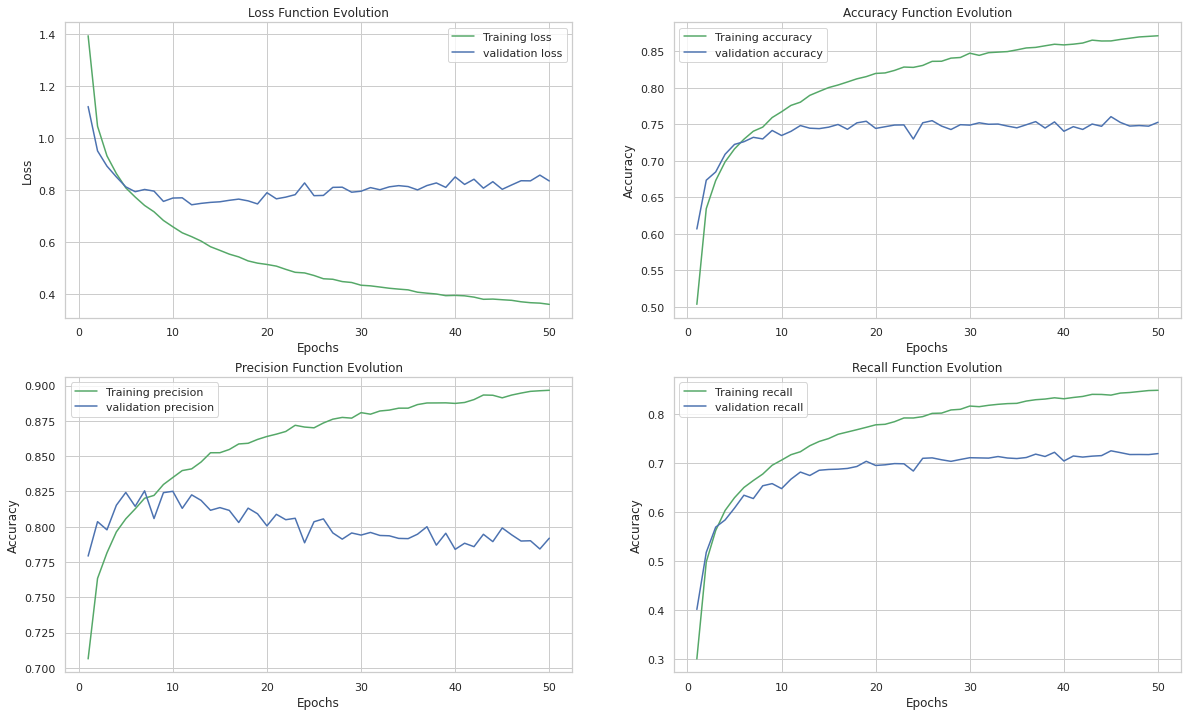

In [15]:
evolution(MODEL1, 50)

These are clear signs of overfitting. But we observed that it's not the case when the epoch number was 10. Even with 15 epochs we should have been okay, because post that the validation accuracy didn't increase even when the network continued to look at the data. 

## CNN model 2: 

- Adding few more layers with Batch Normalization and dropout to mitigate the problem of overfitting and achieve a balanced results for training and validation datasets.


1. Input shape: 32 x 32 , 3 channel


2. Layer 1: Convolution
    - Number of Filters: 32
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Padding: same
    - Stride: 1
    
    
3. Layer 2: Convolution
    - Number of Filters: 32
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 2
    - Padding: same
    - Stride: 1
    
    
4. Layer 3: Convolution
    - Number of Filters: 64
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Padding: same
    - Stride: 1


5. Layer 4: Convolution
    - Number of Filters: 64
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 2
    - Padding: same
    - Stride: 1
    
    
5. Layer 5: Convolution
    - Number of Filters: 128
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Padding: same
    - Stride: 1
    
    
6. Layer 6: Convolution
    - Number of Filters: 128
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 2
    - Padding: same
    - Stride: 1
    

7. Layer 7: Neural network
    - Dense layer units: 128
    - Softmax output units: 10 

In [16]:
model2 = Sequential()

model2.add(Convolution2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model2.add(BatchNormalization())

model2.add(Convolution2D(32, (3,3), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.3))

model2.add(Convolution2D(64, (3,3), padding='same', activation='relu'))
model2.add(BatchNormalization())

model2.add(Convolution2D(64, (3,3), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.5))

model2.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
model2.add(BatchNormalization())

model2.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.5))

model2.add(Flatten())

# fully connected layer
model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

# Classification layer
model2.add(Dense(units=10, activation='softmax'))   

In [17]:
METRICS = [
    'accuracy',
    Precision(name='precision'),
    Recall(name='recall')
]
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=METRICS)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)       

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
batch_size = 62
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [20]:
MODEL2 = model2.fit( train_generator, epochs = 25, validation_data = (X_test, y_test), initial_epoch=0 )

Epoch 1/25
807/807 [==============================] - 28s 32ms/step - loss: 1.8276 - accuracy: 0.3717 - precision: 0.4970 - recall: 0.1939 - val_loss: 1.5920 - val_accuracy: 0.4444 - val_precision: 0.5250 - val_recall: 0.3113
Epoch 2/25
807/807 [==============================] - 25s 32ms/step - loss: 1.3046 - accuracy: 0.5329 - precision: 0.7013 - recall: 0.3466 - val_loss: 1.1579 - val_accuracy: 0.5890 - val_precision: 0.6970 - val_recall: 0.4825
Epoch 3/25
807/807 [==============================] - 25s 31ms/step - loss: 1.1192 - accuracy: 0.6039 - precision: 0.7463 - recall: 0.4554 - val_loss: 1.5273 - val_accuracy: 0.5184 - val_precision: 0.5876 - val_recall: 0.4235
Epoch 4/25
807/807 [==============================] - 26s 32ms/step - loss: 1.0188 - accuracy: 0.6439 - precision: 0.7689 - recall: 0.5178 - val_loss: 0.9098 - val_accuracy: 0.6874 - val_precision: 0.7577 - val_recall: 0.6190
Epoch 5/25
807/807 [==============================] - 26s 32ms/step - loss: 0.9369 - accuracy: 0

In [21]:
# Saving the model
model2.save('CiFAR.h5')
model2.save_weights('CiFAR_weights.h5')

In [22]:
#from tensorflow.keras.models import load_model
#model2_loaded = load_model('cnn.h5')
#model2_loaded.load_weights('cnn_weights.h5')

In [23]:
evaluation = model2.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.5423 - accuracy: 0.8221 - precision: 0.8576 - recall: 0.7955
Test Accuracy : 82.21%


In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
y_pred = model2.predict(X_test)

# converting the one hot encoded labels to single digit ones.
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, y_pred)

In [26]:
# labels of the dataset that we know in the form of a list
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

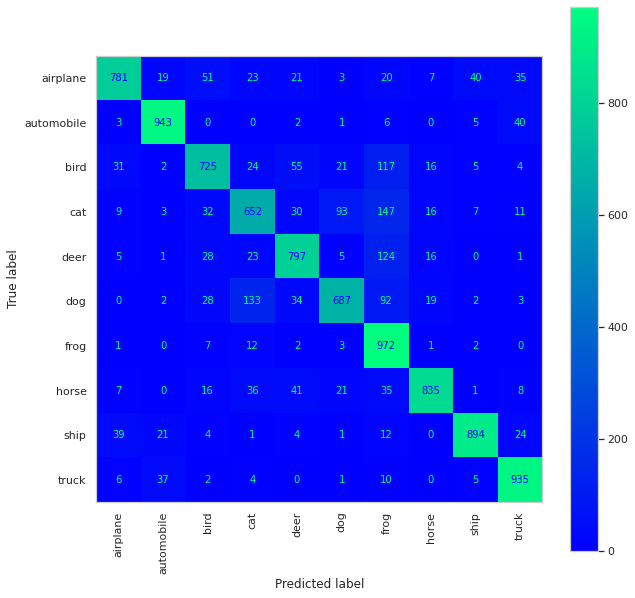

In [27]:
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
display = display.plot(xticks_rotation='vertical', 
                 ax=ax,
                      cmap='winter')

ax.grid(False)
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1000
           1       0.92      0.94      0.93      1000
           2       0.81      0.72      0.77      1000
           3       0.72      0.65      0.68      1000
           4       0.81      0.80      0.80      1000
           5       0.82      0.69      0.75      1000
           6       0.63      0.97      0.77      1000
           7       0.92      0.83      0.87      1000
           8       0.93      0.89      0.91      1000
           9       0.88      0.94      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000

